In [1]:
# importing libraries
import pandas as pd
from surprise import Dataset
from surprise import Reader

In [2]:
# read the ratings into a pandas dataframe and then into a surprise dataset
df = pd.read_csv('ml-latest-small/ml-latest-small/ratings.csv')
df.drop(['timestamp'], axis=1, inplace=True)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)

In [3]:
# create the two algorithms to compare
from surprise import KNNBasic

# KNN with cosine similarity
cosine_knn = KNNBasic(
    k=40,   # maximum number of neighbors to consider for aggregation (when making predictions)
    sim_options={
        'name': 'cosine',
        'user_based': False
    }
)

# KNN with pearson similarity
pearson_knn = KNNBasic(
    k=40,
    sim_options={
        'name': 'pearson',
        'user_based': False
    }
)


In [4]:
# cross validate the two algorithms to compare their performance
from surprise.model_selection import cross_validate

# the cv here is the number of folds to use for cross-validation
# for example, our data has 100836 ratings, so with cv=5, each fold will have around 20167 ratings
cosine_results = cross_validate(cosine_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pearson_results = cross_validate(pearson_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9801  0.9701  0.9810  0.9784  0.9754  0.9770  0.0039  
MAE (testset)     0.7619  0.7554  0.7644  0.7636  0.7603  0.7611  0.0032  
Fit time          5.97    8.18    6.17    6.82    5.79    6.59    0.87    
Test time         6.66    5.76    5.86    5.80    5.72    5.96    0.35    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity

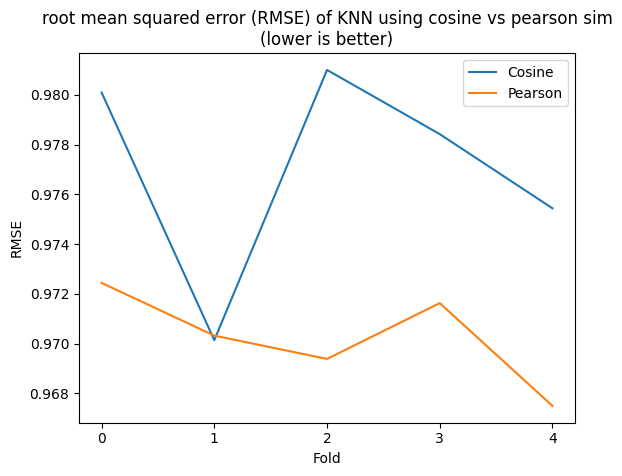

In [16]:
# plot the RMSE for each fold
import matplotlib.pyplot as plt

plt.plot(cosine_results['test_rmse'], label='Cosine')
plt.plot(pearson_results['test_rmse'], label='Pearson')
plt.xticks(range(5))
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()
plt.title('root mean squared error (RMSE) of KNN using cosine vs pearson sim\n(lower is better)')
plt.show()

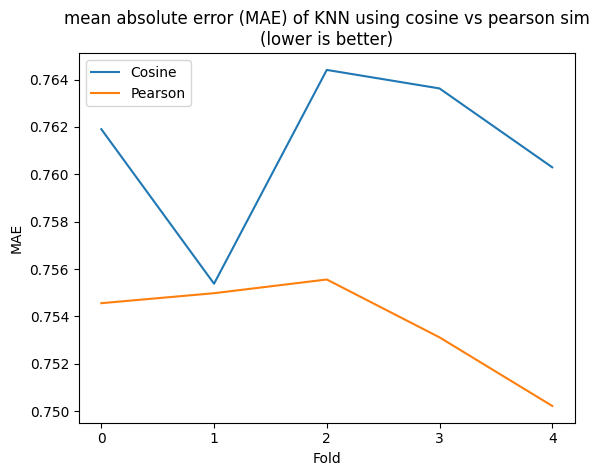

In [17]:
# plot the MAE for each fold
plt.clf()
plt.plot(cosine_results['test_mae'], label='Cosine')
plt.plot(pearson_results['test_mae'], label='Pearson')
plt.xticks(range(5))
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.title('mean absolute error (MAE) of KNN using cosine vs pearson sim\n(lower is better)')
plt.show()

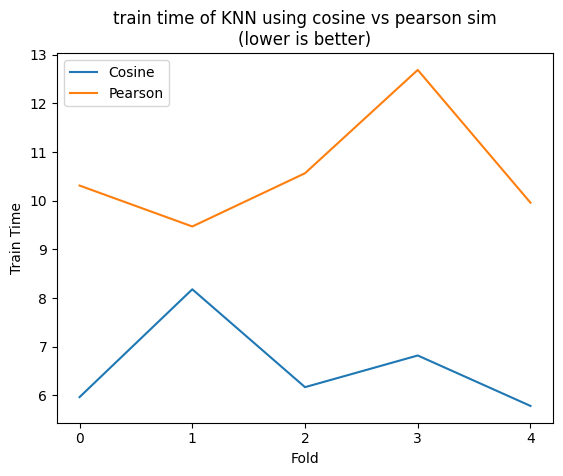

In [18]:
# plot the train time for each fold
plt.clf()
plt.plot(cosine_results['fit_time'], label='Cosine')
plt.plot(pearson_results['fit_time'], label='Pearson')
plt.xticks(range(5))
plt.xlabel('Fold')
plt.ylabel('Train Time')
plt.legend()
plt.title('train time of KNN using cosine vs pearson sim\n(lower is better)')
plt.show()

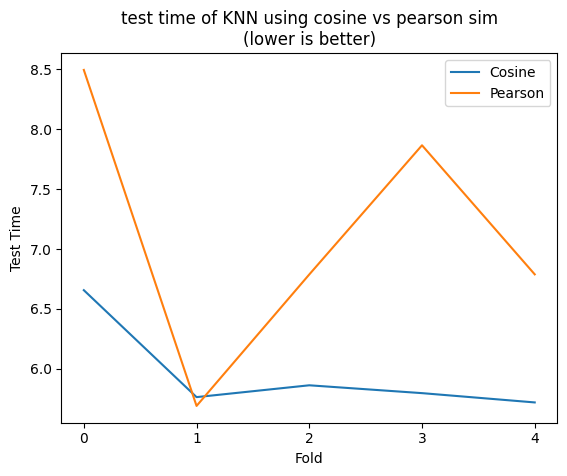

In [19]:
# plot the test time for each fold
plt.clf()
plt.plot(cosine_results['test_time'], label='Cosine')
plt.plot(pearson_results['test_time'], label='Pearson')
plt.xticks(range(5))
plt.xlabel('Fold')
plt.ylabel('Test Time')
plt.legend()
plt.title('test time of KNN using cosine vs pearson sim\n(lower is better)')
plt.show()

## Conclusion

As we can see from the graphs above, both pearson and cosine similarity metrics are able to capture the similarity between the items (movies) based on the ratings given by the users. While pearson similarity does provide a better measure of similarity between items based on the RMSE and MAE graphs, it comes at the cost of increased training and testing time. Cosine similarity, on the other hand, is able to provide a good measure of similarity between items with a lower computational cost (roughly 40% lower training time and 14% lower testing time). While the units in these cases are in seconds, the difference in time taken to train and test the model can be significant when the dataset is large. Therefore I believe it might be better to use cosine similarity in cases where the dataset is large and the computational cost is a concern.